## Preprocessing

In [13]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [14]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


What variable(s) are the target(s) for your model?
    - Is Successful
What variable(s) are the feature(s) for your model?
    - APPLICATION_TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, STATUS, INCOME_AMT, SPECIAL_CONSIDERATIONS, ASK_AMT        

In [15]:
# Determine the number of unique values in each column.
application_df.nunique()



APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [16]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
import matplotlib.pyplot as plt
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)
# Determine which values to replace

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


The log scale was used to gain a better understanding of the distribution  of the less frequent application types and make a more informed decision about the cutoff value

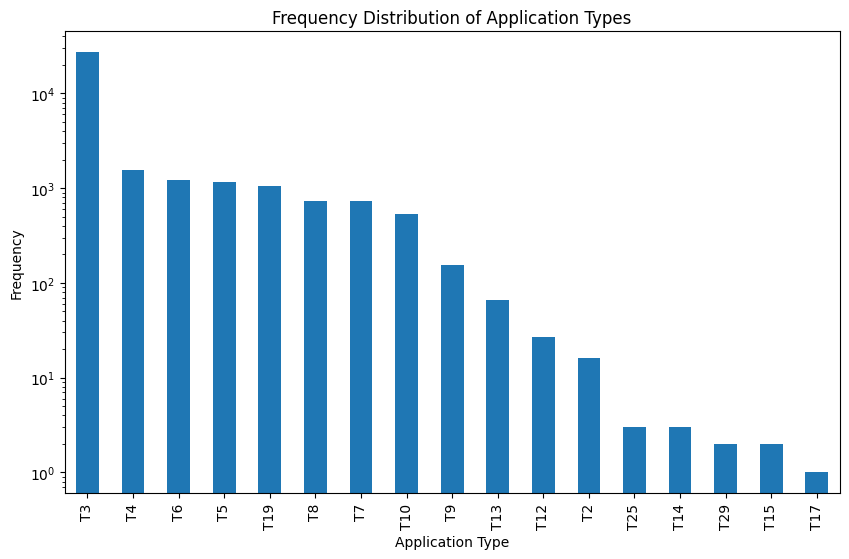

In [18]:
# Step 2: Visualize the distribution
plt.figure(figsize=(10, 6))
application_type_counts.plot(kind='bar')
plt.title('Frequency Distribution of Application Types')
plt.xlabel('Application Type')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization of outliers
plt.show()


In [19]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Choose a cutoff value (example: 500)
cutoff_value = 530

# Create a list of application types to be replaced
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: count, dtype: int64

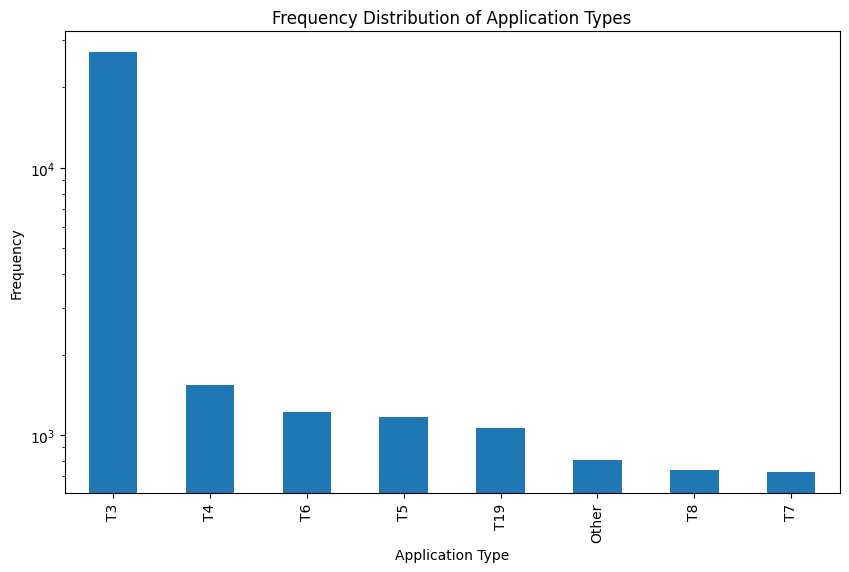

In [21]:
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

plt.figure(figsize=(10, 6))
application_type_counts .plot(kind='bar')
plt.title('Frequency Distribution of Application Types')
plt.xlabel('Application Type')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization of outliers
plt.show()

In [22]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


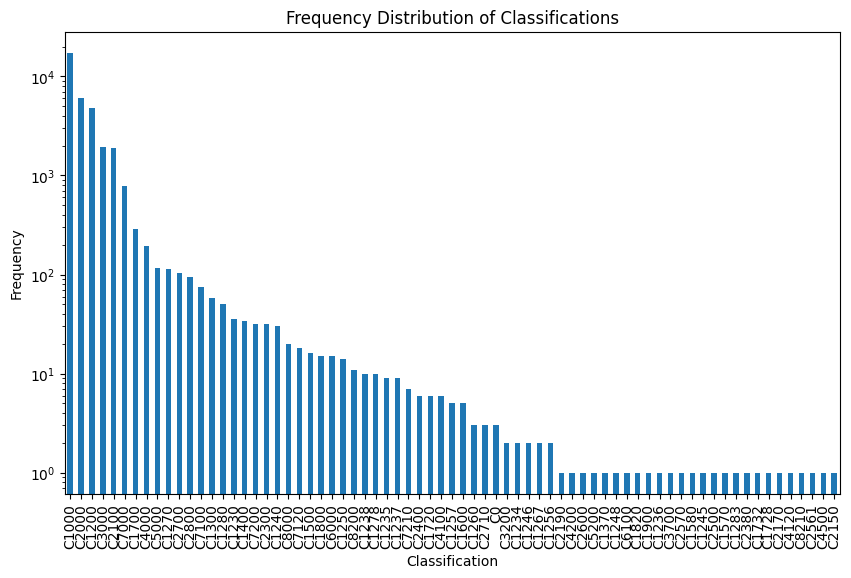

In [24]:
# You may find it helpful to look at CLASSIFICATION value counts >1
print(classification_counts[classification_counts > 1])

# Step 2: Visualize the distribution
plt.figure(figsize=(10, 6))
classification_counts.plot(kind='bar')  
plt.title('Frequency Distribution of Classifications')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization of outliers
plt.show()

In [26]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classification_cutoff_value = 800

# Create a list of application types to be replaced
classifications_to_replace = classification_counts[classification_counts < classification_cutoff_value ].index.tolist()


for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [27]:
status_counts = application_df['STATUS'].value_counts()
print(status_counts)

STATUS
1    34294
0        5
Name: count, dtype: int64


In [28]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_columns = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',  'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']

# Convert categorical data to numeric using pd.get_dummies
application_df = pd.get_dummies(application_df, columns=categorical_columns)

# Display the first few rows of the updated DataFrame
print(application_df.head())

   STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                    True   
1       1   108590              1                   False   
2       1     5000              0                   False   
3       1     6692              1                   False   
4       1   142590              1                   False   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                 False                False                False   
1                 False                 True                False   
2                 False                False                False   
3                 False                 True                False   
4                 False                 True                False   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                False                False                False  ...   
1                False                False                False  ...   

In [29]:
print(application_df.dtypes)

STATUS                          int64
ASK_AMT                         int64
IS_SUCCESSFUL                   int64
APPLICATION_TYPE_Other           bool
APPLICATION_TYPE_T19             bool
APPLICATION_TYPE_T3              bool
APPLICATION_TYPE_T4              bool
APPLICATION_TYPE_T5              bool
APPLICATION_TYPE_T6              bool
APPLICATION_TYPE_T7              bool
APPLICATION_TYPE_T8              bool
AFFILIATION_CompanySponsored     bool
AFFILIATION_Family/Parent        bool
AFFILIATION_Independent          bool
AFFILIATION_National             bool
AFFILIATION_Other                bool
AFFILIATION_Regional             bool
CLASSIFICATION_C1000             bool
CLASSIFICATION_C1200             bool
CLASSIFICATION_C2000             bool
CLASSIFICATION_C2100             bool
CLASSIFICATION_C3000             bool
CLASSIFICATION_Other             bool
USE_CASE_CommunityServ           bool
USE_CASE_Heathcare               bool
USE_CASE_Other                   bool
USE_CASE_Pre

In [30]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
x = application_df.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)



In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train.shape[1]))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3440      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5901 (23.05 KB)
Trainable params: 5901 (23.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


644/644 [==============================] - 1s 1ms/step - loss: 0.5734 - accuracy: 0.7170 - val_loss: 0.5543 - val_accuracy: 0.7347
Epoch 2/100
644/644 [==============================] - 1s 969us/step - loss: 0.5605 - accuracy: 0.7249 - val_loss: 0.5507 - val_accuracy: 0.7374
Epoch 3/100
644/644 [==============================] - 1s 950us/step - loss: 0.5551 - accuracy: 0.7283 - val_loss: 0.5491 - val_accuracy: 0.7343
Epoch 4/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7273 - val_loss: 0.5479 - val_accuracy: 0.7353
Epoch 5/100
644/644 [==============================] - 1s 984us/step - loss: 0.5519 - accuracy: 0.7289 - val_loss: 0.5495 - val_accuracy: 0.7370
Epoch 6/100
644/644 [==============================] - 1s 959us/step - loss: 0.5503 - accuracy: 0.7281 - val_loss: 0.5469 - val_accuracy: 0.7370
Epoch 7/100
644/644 [==============================] - 1s 963us/step - loss: 0.5500 - accuracy: 0.7294 - val_loss: 0.5483 - val_accu

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5704 - accuracy: 0.7258 - 200ms/epoch - 748us/step
Loss: 0.5703510046005249, Accuracy: 0.7258309125900269


In [36]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')

c:\Users\jimco\anaconda3\envs\ml_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
